In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict
import sqlite3
import seaborn as sns

In [20]:
connection = sqlite3.connect('air_disasters.db')
df = pd.read_sql_query("SELECT * FROM disasters", connection)
df

,id,date,aircraft,registration_number,country,location,link
0,1,25.12.2024,Embraer ERJ-190AR,4K-AZ65,Казахстан,"Мангистауская область, район Актау",https://www.airdisaster.ru//database.php?id=4836
1,2,19.12.2024,Ан-2,RA-33555,Россия,"Камчатский край, Усть-Камчатский МО, район г. ...",https://www.airdisaster.ru//database.php?id=4835
2,3,10.12.2024,Ан-2,RA-40418,Россия,"Тюменская область, ЯНАО, Ямальский район, райо...",https://www.airdisaster.ru//database.php?id=4834
3,4,24.11.2024,Сухой SuperJet 100-95LR,RA-89085,Турция,а/п Анталья,https://www.airdisaster.ru//database.php?id=4833
4,5,27.10.2024,Ан-2,RA-33623,Россия,"Ставропольский край, район г. Ессентуки",https://www.airdisaster.ru//database.php?id=4816
...,...,...,...,...,...,...,...
4810,4811,27.01.1932,У-2,-,СССР,"Центрально-Чернозёмная область, 500 м от а/д №...",https://www.airdisaster.ru//database.php?id=3278
4811,4812,25.06.1931,У-1,СССР-313,СССР,"Московская область, район села Тушино",https://www.airdisaster.ru//database.php?id=3310
4812,4813,18.01.1930,К-4,СССР-225,СССР,"Азербайджанская ССР, Баку",https://www.airdisaster.ru//database.php?id=3566
4813,4814,27.10.1929,Fokker C.IV,СССР-150,СССР,"Западно-Сибирский край, Яшкинский район, перег...",https://www.airdisaster.ru//database.php?id=3282


# Метрики полноты данных

Процент пропущенных значений

In [21]:
res = (len(df.loc[(df['date'] == '-') | (df['registration_number'] == '-')]) / len(df)) * 100
res

2.1183800623052957

Полнота

In [22]:
res = (len(df.loc[(df['date'] != '-') & (df['registration_number'] != '-')]) / len(df)) * 100
res

97.88161993769471

# Метрики точности данных

Число уникальных записей

In [23]:
unique_count = df['registration_number'].nunique()
unique_count

4585

Всего записей

In [24]:
len(df)

4815

Число дубликатов

In [25]:
res = len(df) - unique_count
res

230

# EDA

In [26]:
df = df.loc[df['date'] != '-']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4810 entries, 0 to 4814
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   4810 non-null   int64 
 1   date                 4810 non-null   object
 2   aircraft             4810 non-null   object
 3   registration_number  4810 non-null   object
 4   country              4810 non-null   object
 5   location             4810 non-null   object
 6   link                 4810 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


Число инцидентов по типу ВС

In [28]:
df['aircraft'].value_counts()

,count
aircraft,
Ан-2,761
Ми-2,440
Ли-2,281
Ми-8Т,197
Ми-8,174
...,...
L-410UVP,1
Ил-114,1
Ту-154С,1


<ipython-input-29-d59ed3ee2908>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-29-d59ed3ee2908>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


Text(0.5, 1.0, 'Число инцидентов по годам')

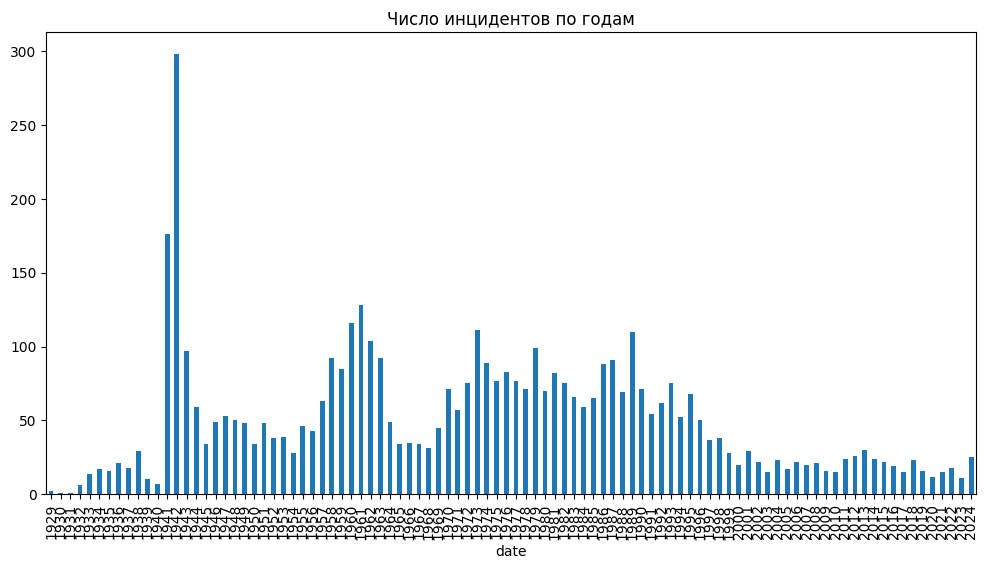

In [29]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
df['date'].dt.to_period('Y').value_counts().sort_index().plot(kind='bar')
plt.title('Число инцидентов по годам')

Всего инцидентов

In [30]:
len(df)

4810